In [20]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [21]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [22]:
df = pd.read_csv(path_base('db_titanic.csv')) 

C:\MyPhyton\Sample\notebook
C:\MyPhyton\Sample\data
C:\MyPhyton\Sample\data\db_titanic.csv


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
from pycaret.classification import *

In [8]:
cols_ignored = ['PassengerId', 'Name', 'Ticket']
num_vars = ['Age', 'SibSp', 'Parch', 'Fare']
cat_vars = ['Pclass', 'Sex', 'Cabin', 'Embarked']

In [9]:
titanic_setup = setup(data=df, target='Survived', session_id=42, train_size=0.7,
                      ignore_features=cols_ignored,
                      numeric_features=num_vars,
                      numeric_imputation='median',
                      categorical_features=cat_vars,
                      categorical_imputation='constant')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
titanic_setup[0]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,22.00000,1.00000,0.00000,7.25000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
1,38.00000,1.00000,0.00000,71.28330,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
2,26.00000,0.00000,0.00000,7.92500,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
3,35.00000,1.00000,0.00000,53.10000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,35.00000,0.00000,0.00000,8.05000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,0.00000,0.00000,13.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
887,19.00000,0.00000,0.00000,30.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
888,28.00000,1.00000,2.00000,23.45000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
889,26.00000,0.00000,0.00000,30.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


In [11]:
[type(x) for x in titanic_setup]

[pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series,
 int,
 sklearn.pipeline.Pipeline,
 list]

In [12]:
compare_models(blacklist = [ 'lightgbm' ])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8284,0.8653,0.6908,0.8396,0.7541,0.6246
1,Gradient Boosting Classifier,0.8187,0.8656,0.6908,0.8135,0.7437,0.6054
2,Extreme Gradient Boosting,0.8171,0.8595,0.7199,0.7901,0.751,0.6071
3,Logistic Regression,0.8155,0.8564,0.7366,0.7784,0.753,0.6065
4,Ridge Classifier,0.8058,0,0.7116,0.7683,0.7362,0.5834
5,Random Forest Classifier,0.8044,0.8529,0.7034,0.7687,0.732,0.579
6,Linear Discriminant Analysis,0.801,0.8525,0.6991,0.7646,0.7283,0.5723
7,Extra Trees Classifier,0.7931,0.8359,0.6951,0.7534,0.7192,0.5563
8,Ada Boost Classifier,0.7912,0.8231,0.737,0.7296,0.7297,0.5605
9,Decision Tree Classifier,0.7657,0.7503,0.7159,0.6877,0.6981,0.5073


In [13]:
xgboost_model = create_model(estimator='gbc', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.84000,0.90110,0.77080,0.80430,0.78720,0.65910
1,0.82400,0.90870,0.75000,0.78260,0.76600,0.62500
2,0.87200,0.86040,0.72920,0.92110,0.81400,0.71840
3,0.82260,0.81780,0.65960,0.83780,0.73810,0.60680
4,0.81450,0.85680,0.68750,0.80490,0.74160,0.59830
Mean,0.83460,0.86890,0.71940,0.83010,0.76940,0.64150
SD,0.02040,0.03300,0.04070,0.04880,0.02850,0.04370


In [14]:
xgboost_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
tuned_xgboost_model = tune_model(estimator='gbc', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.84130,0.89000,0.79170,0.79170,0.79170,0.66350
1,0.82540,0.91030,0.66670,0.84210,0.74420,0.61440
2,0.82540,0.86320,0.66670,0.84210,0.74420,0.61440
3,0.83870,0.90360,0.82610,0.76000,0.79170,0.66050
4,0.83870,0.82240,0.62500,0.93750,0.75000,0.63790
5,0.87100,0.89040,0.79170,0.86360,0.82610,0.72380
6,0.85480,0.88650,0.75000,0.85710,0.80000,0.68690
7,0.77420,0.76700,0.62500,0.75000,0.68180,0.50900
8,0.82260,0.86730,0.66670,0.84210,0.74420,0.61120
9,0.79030,0.80260,0.62500,0.78950,0.69770,0.54050


In [16]:
tuned_xgboost_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.06, loss='deviance', max_depth=80,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=45,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.45000000000000007,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

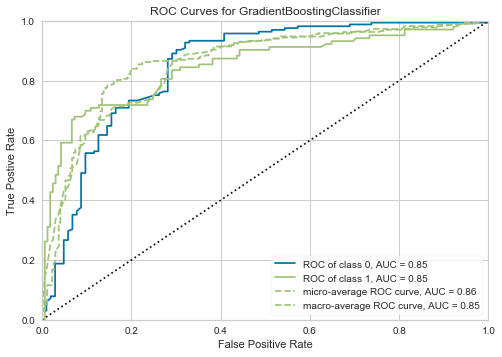

In [17]:
plot_model(tuned_xgboost_model)

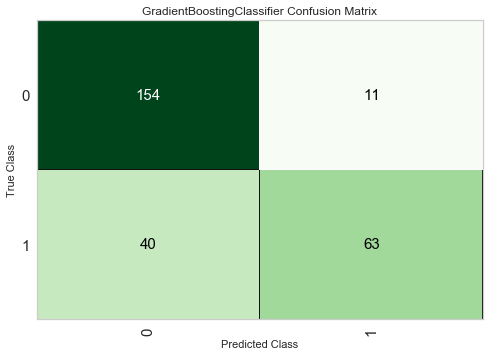

In [18]:
plot_model(tuned_xgboost_model, plot='confusion_matrix')

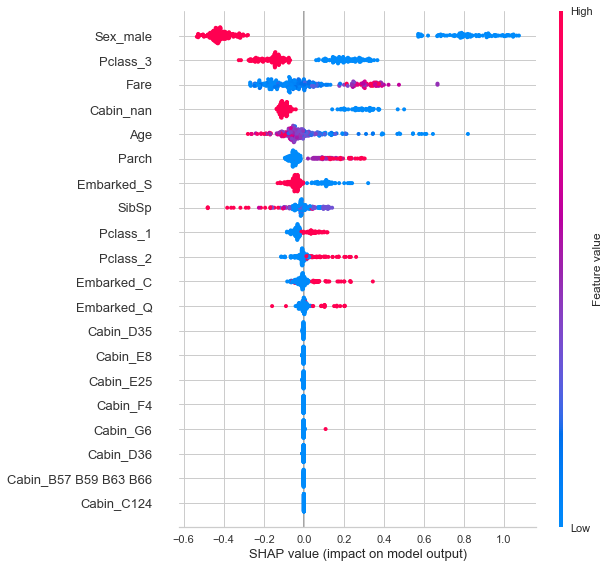

In [19]:
interpret_model(tuned_xgboost_model)